מייבאים את הספריות

In [ ]:
import os
import cv2
import tqdm

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model

from keras import Sequential, regularizers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Rescaling, Activation

ModuleNotFoundError: ignored

מתחברים לדרייב



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


שומרים במשתנה את הFILE PATH

In [ ]:
import pandas as pd
TRAINDIR = '/content/drive/MyDrive/Data_train/'
VALDIR = '/content/drive/MyDrive/Data_val/'
DATA = '/content/drive/MyDrive/Data/'

מחלקים לואל וטריינ

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = ima ge_dataset_from_directory(
    directory = TRAINDIR,
    labels = 'inferred',
    
    batch_size = 32,
    image_size = (256,256))
val_ds = image_dataset_from_directory(
    directory = VALDIR,
    labels = 'inferred',
    
    batch_size = 32,
    image_size = (256,256))

Found 254 files belonging to 2 classes.
Found 61 files belonging to 2 classes.


מדפיסים תמונות לדוגמא

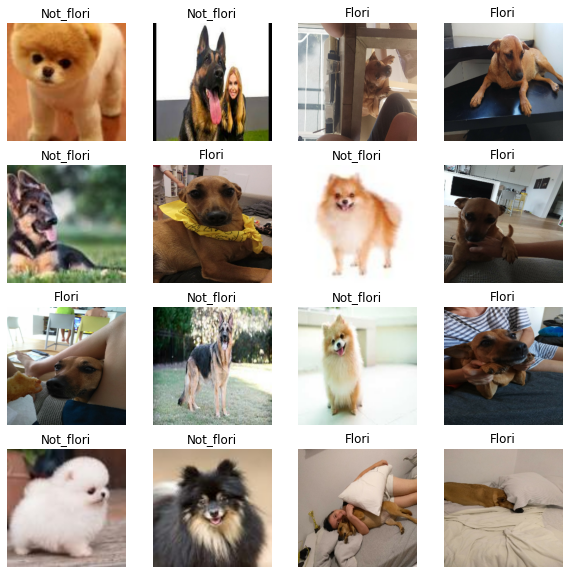

In [ ]:

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

אוגמנטציה

In [ ]:
data_augmentation = keras.Sequential(
    [
        # layers.RandomContrast(factor=0.5),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomCrop(256, 256)
        # layers.RandomHeight(factor=0.5),
        # layers.RandomWidth(factor=0.5),
        # layers.RandomTranslation((-0.2, 0.3),(-0.2, 0.3),fill_mode="reflect",interpolation="bilinear"),
        # layers.RandomZoom((-0.2, 0.3),(-0.2, 0.3),fill_mode="reflect",interpolation="bilinear")
        

    ]
)

מדפיסים תמונה אחרי אוגמנטציה

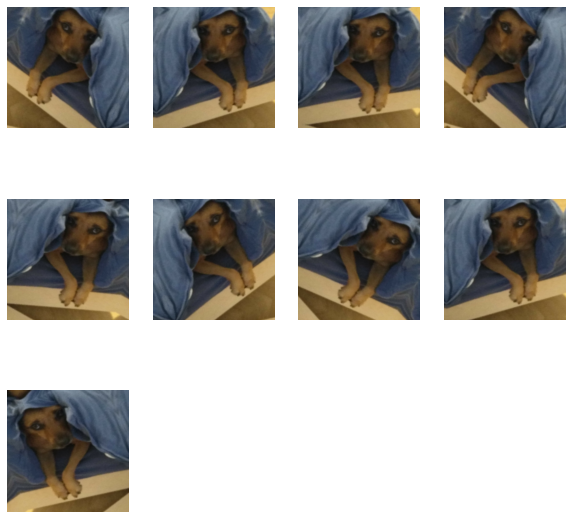

In [ ]:
import random
#random.randint(0,200)
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

בונים את המודל

In [ ]:
from tensorflow.python.ops.numpy_ops.np_array_ops import shape
def make_model(input_shape):
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)
  x = layers.Rescaling(1.0/255)(x)
  #
  x = layers.Conv2D(64,3, strides=1, padding='same')(x)
  x = layers.Conv2D(64,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(128,3, strides=1, padding='same')(x)
  x = layers.Conv2D(128,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x) 
  #
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x) 
  #
  x = layers.Dense(4096, activation='sigmoid')(x)
  x = layers.Dense(4096, activation='sigmoid')(x)
  x = layers.Dense(1000, activation='sigmoid')(x)
  x = Flatten()(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)  
  
  return keras.Model(inputs, outputs)








מסכמים את המודל

In [ ]:
model = make_model((256,256,3))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                             

מקמפלים

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


מריצים 

In [ ]:
model.fit(train_ds, epochs=5,validation_data = val_ds)


Epoch 1/5
8/8 [==============================] - 49s 4s/step - loss: 5.7391 - accuracy: 0.4843 - val_loss: 0.7557 - val_accuracy: 0.3279
Epoch 2/5
8/8 [==============================] - 21s 2s/step - loss: 0.7114 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.3279
Epoch 3/5
8/8 [==============================] - 21s 2s/step - loss: 0.6979 - accuracy: 0.5315 - val_loss: 0.7659 - val_accuracy: 0.3279
Epoch 4/5
8/8 [==============================] - 21s 2s/step - loss: 0.6888 - accuracy: 0.5236 - val_loss: 0.6736 - val_accuracy: 0.6721
Epoch 5/5
8/8 [==============================] - 21s 2s/step - loss: 0.6987 - accuracy: 0.4685 - val_loss: 0.7515 - val_accuracy: 0.3279


מייבאים מודל מגניב|

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.Xception(weights="imagenet", input_shape=(256,256,3),include_top=False)

מקפיאים את האימון של המודל המוכן

In [ ]:
base_model.trainable = False

מוסיפים כמה שכבות בסוף

In [ ]:

inputs = keras.Input(shape=(256,256,3))
x = base_model(inputs,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = keras.layers.Dense(1)(x)
model = keras.Model(inputs,output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


מקמפלים ומריצים את המודל התותח


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss = keras.losses.BinaryCrossentropy(from_logits=True),metrics = [keras.metrics.BinaryAccuracy()])
model.fit(train_ds,epochs=15,validation_data = val_ds)

Epoch 1/15
8/8 [==============================] - 23s 1s/step - loss: 4.8710 - binary_accuracy: 0.5551 - val_loss: 1.7490 - val_binary_accuracy: 0.6557
Epoch 2/15
8/8 [==============================] - 13s 779ms/step - loss: 2.4889 - binary_accuracy: 0.5866 - val_loss: 2.0428 - val_binary_accuracy: 0.6066
Epoch 3/15
8/8 [==============================] - 13s 783ms/step - loss: 1.6470 - binary_accuracy: 0.6811 - val_loss: 1.2370 - val_binary_accuracy: 0.6721
Epoch 4/15
8/8 [==============================] - 13s 784ms/step - loss: 1.2662 - binary_accuracy: 0.6693 - val_loss: 1.3083 - val_binary_accuracy: 0.6721
Epoch 5/15
8/8 [==============================] - 13s 778ms/step - loss: 1.0008 - binary_accuracy: 0.7087 - val_loss: 1.2364 - val_binary_accuracy: 0.6230
Epoch 6/15
8/8 [==============================] - 13s 783ms/step - loss: 0.8463 - binary_accuracy: 0.7441 - val_loss: 1.2648 - val_binary_accuracy: 0.6230
Epoch 7/15
8/8 [==============================] - 13s 786ms/step - loss: 

מורידים מהקפאה ומריצים אחרי פיינ טיונינג

In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam((1e-5)),loss = keras.losses.BinaryCrossentropy(from_logits=True),metrics = [keras.metrics.BinaryAccuracy()])
model.fit(train_ds,epochs = 5,validation_data = val_ds)

Epoch 1/5
8/8 [==============================] - 39s 2s/step - loss: 0.3355 - binary_accuracy: 0.9094 - val_loss: 2.4735 - val_binary_accuracy: 0.5902
Epoch 2/5
8/8 [==============================] - 24s 2s/step - loss: 0.3095 - binary_accuracy: 0.9016 - val_loss: 1.2712 - val_binary_accuracy: 0.6721
Epoch 3/5
8/8 [==============================] - 24s 2s/step - loss: 0.1532 - binary_accuracy: 0.9252 - val_loss: 1.2864 - val_binary_accuracy: 0.6885
Epoch 4/5
8/8 [==============================] - 24s 2s/step - loss: 0.0849 - binary_accuracy: 0.9724 - val_loss: 1.7700 - val_binary_accuracy: 0.5902
Epoch 5/5
8/8 [==============================] - 24s 2s/step - loss: 0.0217 - binary_accuracy: 0.9843 - val_loss: 1.3426 - val_binary_accuracy: 0.7213


יאי הכל עובד :)